# 支持向量机

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import math

支持向量机(Support Vector Mechine, SVM)是在分类与回归分析中分析数据的监督式学习模型与相关的学习算法。给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法创建一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。SVM模型是将实例表示为空间中的点，这样映射就使得单独类别的实例被尽可能宽的明显的间隔分开。然后，将新的实例映射到同一空间，并基于它们落在间隔的哪一侧来预测所属类别。
在机器学习中，支持向量机(Support Vector Mechine, SVM)是在分类与回归分析中的有监督学习模型。给定一组训练样本，每个样本都被标记为属于两个类别中的一个，支持向量机训练算法会建立一个模型，将新样本分配到其中一个类别，使其成为一个非概率的二元线性分类器。支持向量机将训练样本映射到空间中的点，从而使两类之间的差距最大化。然后，新的样本被映射到相同的空间中，并根据它们所处的位置来预测属于哪一个类别。

给定样本$\{(\mathrm{x}^{(1)}, y^{(1)}), (\mathrm{x}^{(2)}, y^{(2)}),\cdots, (\mathrm{x}^{(m)}, y^{(m)})\},\quad y^{(i)} \in \{ -1, 1 \}$，分类其实就是想要找到一个划分超平面，将不同类别的样本分开。

<img src=img/separating_hyperplanes.png height="500">

在给定的样本空间，超平面可以表示为
$$
\mathrm{w}^{\mathsf{T}} \mathrm{x} + b = 0
$$
如果划分超平面能正确分类，那么，对 $y^{(i)} = +1$，有 $\mathrm{w}^{\mathsf{T}} \mathrm{x} + b > 0 $，对$y^{(i)} = -1$，有 $\mathrm{w}^{\mathsf{T}} \mathrm{x} + b < 0 $。事实上，对任意样本都可以表示成为 $y^{(i)}(\mathrm{w}^{\mathsf{T}} \mathrm{x} + b) > 0$。


<img src=img/SVM-Intuitive.jpg height="500">

容易知道，样本点 $\mathrm{x}^{(i)}$ 到超平面的距离可以写成，
$$
\gamma^{(i)} = \frac{|\mathrm{w}^{\mathsf{T}} \mathrm{x}^{(i)} + b|}{||\mathrm{w}||} = \frac{y^{(i)}(\mathrm{w}^{\mathsf{T}} \mathrm{x}^{(i)} + b)}{||\mathrm{w}||}
$$
定义间隔（Margin）$\gamma$ 为整个样本数据集中所有样本到划分超平面的最短距离：
$$
\gamma = \min_{i} \gamma^{(i)}
$$

如果间隔$\gamma$ 越大，其分割超平面对两个数据集的划分越稳定，不容易受噪声等因素影响。支持向量机的目标是寻找一个超平面使得 $\gamma$ 最大，即
$$
\begin{aligned}
& \max_{\mathrm{w}, b} \quad \gamma \\
& s.t. \quad \frac{y^{(i)}(\mathrm{w}^{\mathsf{T}} \mathrm{x}^{(i)} + b)}{||\mathrm{w}||} \ge \gamma, \quad \forall i = 1,2, \cdots, m
\end{aligned}
$$

令 $||\mathrm{w}|| \cdot \gamma = 1$，则上式等价于
$$
\begin{aligned}
& \max_{\mathrm{w}, b} \quad \frac{1}{||\mathrm{w}||} \\
& s.t. \quad y^{(i)}(\mathrm{w}^{\mathsf{T}} \mathrm{x}^{(i)} + b) \ge 1, \quad \forall i \in \{ 1,2, \cdots, m \}
\end{aligned}
$$

最大化 $\frac{1}{||\mathrm{w}||^2}$，等价于最小化 $||\mathrm{w}||$，所以可以写成
$$
\begin{aligned}
& \min_{\mathrm{w}, b} \quad \frac{1}{2}||\mathrm{w}||^2 \\
& s.t. \quad y^{(i)}(\mathrm{w}^{\mathsf{T}} \mathrm{x}^{(i)} + b) \ge 1, \quad \forall i \in \{ 1,2, \cdots, m \}
\end{aligned}
$$

这是SVM的基本模型。这个模型可以通过凸二次规划的方法解决。但是有更有效的算法。

对这个模型的约束条件加上拉格朗日乘子 $\alpha_i \ge 0$，则得到拉格朗日函数：
$$
L(\mathrm{w}, b, \mathrm{\alpha}) = \frac{1}{2}||\mathrm{w}||^2  + \sum_{i=1}^{m} \alpha_i(1 - y^{(i)}(\mathrm{w}^{\mathsf{T}} \mathrm{x}^{(i)} + b))
$$

令 $L(\mathrm{w}, b, \mathrm{\alpha})$对 $\mathrm{w}, b$的偏导数为零，可以得到

$$
\begin{aligned}
& \mathrm{w} = \sum_{i=1}^{m} \alpha_i y^{(i)} \mathrm{x}^{(i)} \\
& 0 = \sum_{i=1}^{m} \alpha_i y^{(i)}
\end{aligned}
$$


带入$L(\mathrm{w}, b, \mathrm{\alpha})$中，可以得到模型的对偶问题
$$
\begin{aligned}
&\max_\alpha \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y^{(i)} y^{(j)} \langle \mathrm{x}^{(i)}, \mathrm{x}^{(j)}\rangle \alpha_i \alpha_j \\
&\text { s.t. } \\
&\alpha_i \ge 0, \quad \forall i \in {1,2, \ldots, m} \\
&\sum_{i=1}^n y^{(i)} \alpha_i=0
\end{aligned}
$$

解出 $\alpha$之后，可以得到模型
$$
f(\mathrm{x}) = \mathrm{w}^{\mathsf{T}} \mathrm{x} + b = \sum_{i=1}^{m} \alpha_i y^{(i)} \langle \mathrm{x}^{(i)}, \mathrm{x} \rangle + b
$$

注意到上述模型需要满足KKT(Karush-Kuhn-Tucker)条件
$$
\begin{aligned}
&\alpha_i \ge 0\\
&y ^{(i)}f(\mathrm{x}^{(i)}) - 1 \ge 0 \\
&\alpha_i(y ^{(i)}f(\mathrm{x}^{(i)}) - 1) = 0
\end{aligned}
$$

对于任意样本 $(\mathrm{x}^{(i)}, y^{(i)}$，如果 $\alpha_i = 0$，则该样本不会出现在 $f(\mathrm{x})$ 中；如果 $\alpha_i > 0$，则 $y ^{(i)}f(\mathrm{x}^{(i)}) = 1$，说明该样本在最大间隔上。这样的样本称为支持向量。

## SMO(Sequential Minimal Optimization)算法

具体来说，希望解决
$$
\begin{aligned}
&\max_\alpha \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y^{(i)} y^{(j)} \langle \mathrm{x}^{(i)}, \mathrm{x}^{(j)}\rangle \alpha_i \alpha_j \\
&\text { s.t. } \\
&0 \le \alpha_i \le C, \quad \forall i \in {1,2, \ldots, m} \\
&\sum_{i=1}^n y^{(i)} \alpha_i=0
\end{aligned}
$$

从上面推导可知，如果求解出了 $\alpha$，那么
$$
f(\mathrm{x}) =\sum_{i=1}^{m} \alpha_i y^{(i)} \langle \mathrm{x}^{(i)}, \mathrm{x} \rangle + b
$$

那么预测值为
$$
\hat{y}^{(i)} = \operatorname{sign}(f(\mathrm{x}) )
$$
其中 $\operatorname{sign}(x \ge 0) = 1$， $\operatorname{sign}(x < 0) = -1$ 。

In [2]:
def f(alphas, b, X, y, x):
    return x @ np.dot(X.T, np.multiply(alphas, y)) + b

In [3]:
def predict(w, b, X):
    return np.sign(X@w + b)

#### 第一步 选择一个合适的 $\alpha$

整个SMO算法的大部分都致力于启发式地选择 $\alpha_i$ 和 $\alpha_j$ 进行优化，以便尽可能地使目标函数最大化。对于大型数据集，这对算法的速度至关重要，因为 $\alpha_i$ 和 $\alpha_j$ 有 $m(m−1)$ 种可能的选择，其中一些的改进效果会比其他的差得多。为了简化算法，可以采用了一种更简单的启发式方法。只需遍历所有 $\alpha_i$。如果 $\alpha_i$ 不能满足KKT条件到一定的数值容忍范围内，我们从剩余的$m−1$个 $\alpha$ 中随机选择 $\alpha_j$，并尝试联合优化 $\alpha_i$ 和 $\alpha_j$ 。如果在对所有的 $\alpha_i$ 进行几次迭代后，没有一个改变，那么算法就终止了。当然，通过采用这种简化，算法不再保证收敛到全局最优(因为没有尝试所有可能的  $(\alpha_i, \alpha_j)$ 对)。

In [4]:
def select_j(m, i):
    np.random.seed(int(time.time()))
    return np.random.choice(np.append(np.arange(i), np.arange(i+1, m)))

### 第二步 优化 $\alpha_i$，$\alpha_j$

根据约束条件 $\sum_{i=1}^n y^{(i)} \alpha_i=0$，固定除 $\alpha_i, \alpha_j$ 之外的 $\alpha$，可以得到
$$
y^{(i)} \alpha_i + y^{(j)} \alpha_j = k
$$
其中 $k = -\sum_{s\ne i, j}^n y^{(s)} \alpha_s$。所以，如果选定了 $\alpha_i$，根据上式可以计算 $\alpha_j$的值，但事实上，要满足约束条件 $0 \le \alpha_j \le C$。所以需要计算$\alpha_j$的上下界。

<img src=img/alpha_ij.png height="500">

如图所示，综合两种情况，可以计算上下界。

$$
\begin{aligned}
\text{if} \quad y^{(i)} \ne y^{(j)}， L = \max(0, \alpha_i - \alpha_j), \quad H = \min(C, C+\alpha_i - \alpha_j)\\
\text{if} \quad y^{(i)} = y^{(j)}， L = \max(0, \alpha_i + \alpha_j - C), \quad H = \min(C, \alpha_i + \alpha_j)
\end{aligned}
$$

In [5]:
def bound(alpha_i, alpha_j, y_i, y_j, C):
    if y_i != y_j:
        return max(0, alpha_j - alpha_i), min(C, C + alpha_j - alpha_i)
    else:
        return max(0, alpha_i + alpha_j - C), min(C, alpha_i + alpha_j)

现在我们要求 $\alpha_j$ 使目标函数最大化。如果这个值超出了 $L$ 和 $H$ 的范围，只需将 $\alpha_j$ 的值限定到这个范围内。

根据 $y^{(i)} \alpha_i + y^{(j)} \alpha_j = k$，计算出 $\alpha_i = y^{(i)}k - y^{(i)}y^{(j)}\alpha_j$，带入
$$
\sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y^{(i)} y^{(j)} \langle \mathrm{x}^{(i)}, \mathrm{x}^{(j)}\rangle \alpha_i \alpha_j
$$

可以得到关于 $\alpha_j$的一元二次方程。再经过冗长的初等计算，可以得到： 



$$
\alpha_j = \alpha_j^{(old)} - \frac{y^{(j)}(E_i - E_j)}{\eta}
$$

$$
\alpha_j = 
\begin{split}
H, & \quad \alpha_i > H \\
\alpha_i,& \quad L \le \alpha_i \le H \\
L, &\quad \alpha_i < L
\end{split}
$$

其中：
$$
E_k = f(y^{(k)}) - y^{(k)}
$$

$$
\eta = 2 K_{ij} - K_{ii} - K_{jj}
$$

并且
$$
\mathrm{K} = \mathrm{X}^\mathsf{T} \mathrm{X} = 
\begin{bmatrix}
\langle \mathrm{x}^{(1)}, \mathrm{x}^{(1)} \rangle & \langle \mathrm{x}^{(1)}, \mathrm{x}^{(2)} \rangle & \cdots & \langle \mathrm{x}^{(1)}, \mathrm{x}^{(m)} \rangle \\
\langle \mathrm{x}^{(2)}, \mathrm{x}^{(1)} \rangle & \langle \mathrm{x}^{(2)}, \mathrm{x}^{(2)} \rangle & \cdots & \langle \mathrm{x}^{(2)}, \mathrm{x}^{(m)} \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle \mathrm{x}^{(m)}, \mathrm{x}^{(1)} \rangle & \langle \mathrm{x}^{(m)}, \mathrm{x}^{(2)} \rangle & \cdots & \langle \mathrm{x}^{(m)}, \mathrm{x}^{(m)} \rangle \\
\end{bmatrix}
$$

求出 $\alpha_j$ 之后，可以求出 $\alpha_i$ 的值。
$$
\alpha_i = \alpha_i^{(old)} + y^{(i)}y^{(j)}(\alpha_j^{(old)} - \alpha_j)
$$

In [6]:
def calculate_alpha_j(y_i, y_j, alpha_i, alpha_j, E_i, E_j, eta, L, H):
    return np.clip(alpha_j - y_j * (E_i - E_j) / eta, L, H)

def calculate_alpha_i(y_i, y_j, alpha_i, alpha_j, alpha_j_old):
    return alpha_i + y_i * y_j * (alpha_j_old - alpha_j)



### 第三步 计算 $\mathrm{w}, b$

更新 $\alpha_i, \alpha_j$之后，可以更新 $w, b$。

根据KKT条件

$$
\begin{aligned}
\alpha_i=0 & \Rightarrow y^{(i)}\left(w^T \mathrm{x}^{(i)}+b\right) \geq 1 \\
\alpha_i=C & \Rightarrow y^{(i)}\left(w^T \mathrm{x}^{(i)}+b\right) \leq 1 \\
0<\alpha_i<C & \Rightarrow y^{(i)}\left(w^T \mathrm{x}^{(i)}+b\right)=1 .
\end{aligned}
$$

如果 $0 < \alpha_i < C$，则

$$
b = b_1 = b - E_i - y^{(i)}(\alpha_i - \alpha_i^{(old)}) \langle \mathrm{x}^{(i)}, \mathrm{x}^{(i)} \rangle - y^{(j)}(\alpha_j - \alpha_j^{(old)}) \langle \mathrm{x}^{(i)}, \mathrm{x}^{(j)} \rangle
$$


如果 $0 < \alpha_j < C$，则

$$
b = b_2 = b - E_j - y^{(i)}(\alpha_i - \alpha_i^{(old)}) \langle \mathrm{x}^{(i)}, \mathrm{x}^{(i)} \rangle - y^{(j)}(\alpha_j - \alpha_j^{(old)}) \langle \mathrm{x}^{(i)}, \mathrm{x}^{(j)} \rangle
$$


如果 $\alpha_i, \alpha_j$都不在区间$(0, C)$，则计算用 $b_1$， $b_2$ 的中点。

$$
b = \frac{b_1 + b_2} {2}
$$

In [7]:
def calculate_b(b, y_i, y_j, alpha_i, alpha_j, alpha_i_old, alpha_j_old, E_i, E_j, K_ij, K_ii, C):

    b_one = b - E_i - y_i * (alpha_i - alpha_i_old) * K_ii - y_j * (alpha_j - alpha_j_old) * K_ij 
    b_two = b - E_j - y_i * (alpha_i - alpha_i_old) * K_ii - y_j * (alpha_j - alpha_j_old) * K_ij 

    if alpha_i > 0 and alpha_i < C:
        return b_one
    elif alpha_j > 0 and alpha_j < C:
        return b_two
    else:
        return (b_one + b_two) / 2

$\mathrm{w}$的值可以根据下式计算
$$
\mathrm{w} = \sum_{i=1}^{m} \alpha_i y^{(i)} \mathrm{x}^{(i)}
$$

In [8]:
def calculate_w(alpha, X, y):
        return np.dot(X.T, np.multiply(alpha, y))
        #return np.dot((np.tile(y.reshape(1, -1).T, (1, 2)) * X).T, alpha)

重复前面三步，就可以实现简易版的SMO算法。

In [9]:
def simplified_smo(X, y, C=2, tol=1e-5, epoches=100):
    m, n = X.shape    
    b = 0
    alphas = np.zeros((m, 1))
    b = 0.0
    epoch = 0
    K = X @ X.T
    while epoch < epoches:
        num_changed_alphas = 0
        
        for i in range(m):
            E_i = f(alphas, b, X, y, X[i,:]) - y[i]
            y_i_E_i = float(y[i]) * E_i

            if (y_i_E_i < (-1 * tol) and alphas[i] < C) or (y_i_E_i > tol and alphas[i] > 0):
                
                j = select_j(m, i)

                alpha_i_old = alphas[i].copy()
                alpha_j_old = alphas[j].copy()

                L, H = bound(alphas[i], alphas[j], y[i], y[j], C)

                if L == H:
                    continue

                eta = 2 * K[i, j] - K[i, i] - K[j, j]

                if eta >= 0:
                    continue
                
                E_j = f(alphas, b, X, y, X[j,:]) - y[j]

                alphas[j] = calculate_alpha_j(y[i], y[j], alphas[i], alphas[j], E_i, E_j, eta, L, H)
                
                if np.abs(alphas[j] - alpha_j_old) < 0.000005:
                    continue
                
                #alphas[i] += y[i]*y[j]*(alpha_j_old - alphas[j])
                alphas[i] = calculate_alpha_i(y[i], y[j], alphas[i], alphas[j], alpha_j_old)

                b = calculate_b(b, y[i], y[j], alphas[i], alphas[j], alpha_i_old, alpha_j_old, E_i, E_j, K[i, j], K[i, i], C)
                #w = calculate_w(alphas, X, y)
                num_changed_alphas += 1
        
        if num_changed_alphas == 0:
            epoch += 1
        else:
            epoch = 0

        w = calculate_w(alphas, X, y)

        return alphas, w, b


In [10]:
def plot(X, y, w, b):

    class1 = X[np.tile(y > 0, X.shape[1])].reshape(-1, X.shape[1])
    class2 = X[np.tile(y < 0, X.shape[1])].reshape(-1, X.shape[1])

    plt.scatter(class1[:, 0], class1[:, 1], s=30, alpha=0.7)
    plt.scatter(class2[:, 0], class2[:, 1], s=30, alpha=0.7)

    x1, x2 = X[:, 0].max(), X[:, 0].min()
    y1, y2 = (-b - w[0]*x1)/w[1], (-b - w[0]*x2)/w[1]

    plt.plot([x1, x2], [y1, y2])


[[ 0.96638214]
 [-0.09663821]] [-0.51680893]
0.9333333333333333


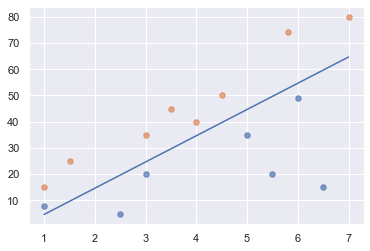

In [15]:
X = [[1, 8], [3, 20], [1, 15], [3, 35], [5, 35], [4, 40], [7, 80], [6, 49], [
    1.5, 25], [3.5, 45], [4.5, 50], [6.5, 15], [5.5, 20], [5.8, 74], [2.5, 5]]
y = [1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1]

X = np.array(X).reshape(-1, 2)
y = np.array(y).reshape(-1, 1)

alphas, w, b = simplified_smo(X, y)
print(w, b)
y_hat = predict(w, b, X)
print(np.mean(y_hat == y))

plot(X, y, w, b)


### 核函数

上面求解的支持向量机都是建立在线性可分的假设下，而如果是非线性情况下，可以将样本从原始空间映射到一个更高为的特征空间，使得样本在这个特征空间内线性可分。

令 $\mathrm{\phi}(\mathrm{x}$ 表示 $\mathrm{x}$ 映射后的向量。于是：
$$
f(\mathrm{x}) =\sum_{i=1}^{m} \alpha_i y^{(i)} \langle \mathrm{\phi}(\mathrm{x}^{(i)}), \mathrm{\phi}(\mathrm{x}) \rangle + b
$$

但是，映射后的向量可能是无穷维空间，计算$\langle \mathrm{\phi}(\mathrm{x}^{(i)}), \mathrm{\phi}(\mathrm{x}) \rangle$ 是比较困难的。所以为了简化计算，可以找到某种核函数逼近这个值。
$$
\kappa(\mathrm{x}^{(i)}, \mathrm{x}^{(j)})   = \langle \mathrm{\phi}(\mathrm{x}^{(i)}), \mathrm{\phi}(\mathrm{x}^{(j)}) \rangle
$$

常见的核函数有
$$
\begin{aligned}
\text{线性核}  & \qquad \mathrm{x}_i^T \mathrm{x}_j \\
\text{多项式核}&  \qquad(\mathrm{x}_i^T \mathrm{x}_j)^d \\
\text{高斯核} &\qquad\exp (-\frac{|\mathrm{x}_i-\mathrm{x}_j|^2}{2 \sigma^2}) \\
\text{拉普拉斯核}& \qquad\exp (-\frac{|\mathrm{x}_i-\mathrm{x}_j|}{\sigma}) \\
\text{sigmoid核}& \qquad\tanh (\beta \mathrm{x}_i^T \mathrm{x}_j+\theta)
\end{aligned}
$$

## sklearn SVM

```python
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                probability=False, tol=0.001, cache_size=200, class_weight=None, 
                verbose=False, max_iter=-1, decision_function_shape='ovr', 
                random_state=None)
```

### 参数

- `C` （float参数 默认值为1.0）
  
    表示错误项的惩罚系数`C`越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低；相反，减小`C`的话，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。
- `kernel` （str参数 默认为`‘rbf’`）
  
    该参数用于选择模型所使用的核函数，算法中常用的核函数有：
    
    - `linear`：线性核函数
    - `poly`：多项式核函数
    - `rbf`：径像核函数/高斯核
    - `sigmod`：`sigmod`核函数
    - `precomputed`：核矩阵，该矩阵表示自己事先计算好的，输入后算法内部将使用你提供的矩阵进行计算
- `degree` （int型参数 默认为3）
  
    该参数只对`'kernel=poly'`(多项式核函数)有用，是指多项式核函数的阶数n，如果给的核函数参数是其他核函数，则会自动忽略该参数。
- `gamma` （float参数 默认为auto）
  
    该参数为核函数系数，只对`‘rbf’`,`‘poly’`,`‘sigmod’`有效。如果`gamma`设置为`auto`，代表其值为样本特征数的倒数，即`1/n_features`，也有其他值可设定。
- `coef0`:（float参数 默认为0.0）

    该参数表示核函数中的独立项，只有对`‘poly’`和`‘sigmod’`核函数有用，是指其中的参数c。
- `probability` （bool参数 默认为`False`）
  
    该参数表示是否启用概率估计。 这必须在调用`fit()`之前启用，并且会使`fit()`方法速度变慢。
- `shrinking`（bool参数 默认为True）
  
    该参数表示是否选用启发式收缩方式。
- `tol`（ float参数 默认为1e^-3）
  
    svm停止训练的误差精度，也即阈值。
- `cache_size`（float参数 默认为200）
  
    该参数表示指定训练所需要的内存，以MB为单位，默认为200MB。
- `class_weight`（字典类型或者`‘balance’`字符串。默认为None）
  
    该参数表示给每个类别分别设置不同的惩罚参数C，如果没有给，则会给所有类别都给C=1，即前面参数指出的参数C。如果给定参数‘balance’，则使用y的值自动调整与输入数据中的类频率成反比的权重。
- `verbose` （ bool参数 默认为`False`）
  
    该参数表示是否启用详细输出。此设置利用libsvm中的每个进程运行时设置，如果启用，可能无法在多线程上下文中正常工作。一般情况都设为False，不用管它。
- `max_iter` （int参数 默认为-1）
  
    该参数表示最大迭代次数，如果设置为-1则表示不受限制。
- `random_state`（int参数 默认为`None`）
  
    该参数表示在混洗数据时所使用的伪随机数发生器的种子，如果选int，则为随机数生成器种子；如果选RandomState instance，则为随机数生成器；如果选None,则随机数生成器使用的是np.random。

### 方法

- `svc.decision_function(X)`
  
    样本X到分离超平面的距离
- `svc.fit(X, y[, sample_weight])`
  
    根据给定的训练数据拟合SVM模型。
- `svc.get_params([deep])`
  
    获取此估算器的参数并以字典行书储存,默认deep=True。
- `svc.predict(X)`
  
    根据测试数据集进行预测
- `svc.score(X, y[, sample_weight])`
    
    返回给定测试数据和标签的平均精确度
- `svc.predict_log_proba(X_test)`，`svc.predict_proba(X_test)`
  
    当`sklearn.svm.SVC(probability=True)`时，才会有这两个值，分别得到样本的对数概率以及普通概率。


In [12]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# split the data to  8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# select different type of kernel function and compare the score

# kernel = 'rbf'
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
score_rbf = clf_rbf.score(X_test, y_test)
print("The score of rbf is : %f" % score_rbf)

# kernel = 'linear'
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
score_linear = clf_linear.score(X_test, y_test)
print("The score of linear is : %f" % score_linear)

# kernel = 'poly'
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
score_poly = clf_poly.score(X_test, y_test)
print("The score of poly is : %f" % score_poly)


The score of rbf is : 1.000000
The score of linear is : 1.000000
The score of poly is : 0.966667


### SVM 可视化

In [20]:
from matplotlib.colors import ListedColormap
sns.set()
def test_plot (X, y, model):
    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
    rgb = np.array([[210, 0, 0] , [0, 0, 150]]) / 255.0

    model.fit(X, y)

    zz = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y , s=50 , cmap='autumn')
    plt.contour(xx, yy, zz, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles =['--', '-', '--'])
    plt.contourf(xx, yy, np.sign(zz.reshape(xx.shape)), alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)

c:\Users\mijiy\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


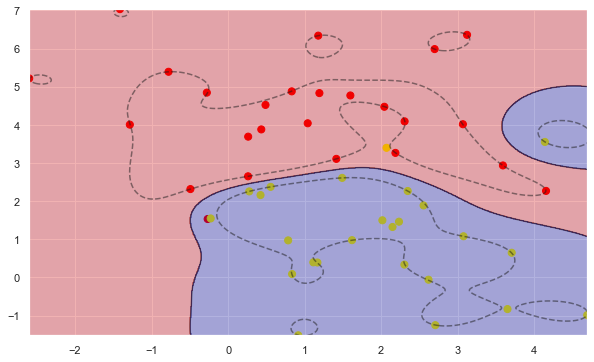

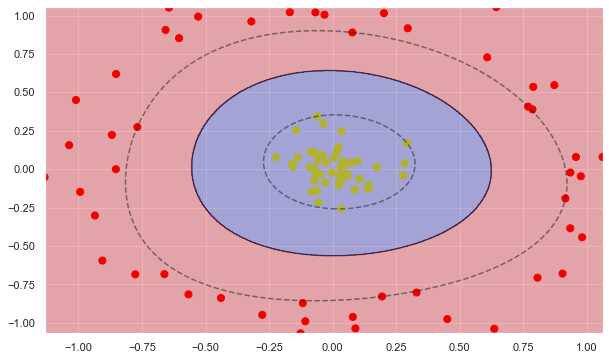

In [21]:
from sklearn.datasets import make_blobs , make_circles

plt.figure(figsize=(10, 6))
X , y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1.4)
test_plot (X, y, svm.SVC(kernel='rbf', C=10, max_iter=100, degree=3, gamma=1))
plt.figure(figsize=(10, 6))
X , y = make_circles (100, factor=.1 , noise=.1)
test_plot (X, y, svm.SVC(kernel='rbf', C=10, max_iter=100 , degree=3, gamma=1))